In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
tf.random.set_seed(1234)

# Zad
Porównaj wyniki działań różnych optymalizacji


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [5]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [6]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5091 - accuracy: 0.7613 - val_loss: 0.3771 - val_accuracy: 0.8222
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8382 - val_loss: 0.3416 - val_accuracy: 0.8388
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3369 - accuracy: 0.8426 - val_loss: 0.3362 - val_accuracy: 0.8412
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8440 - val_loss: 0.3375 - val_accuracy: 0.8388
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3297 - accuracy: 0.8448 - val_loss: 0.3296 - val_accuracy: 0.8474
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3282 - accuracy: 0.8456 - val_loss: 0.3285 - val_accuracy: 0.8452
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3278 - accuracy: 0.8457 - val_loss: 0.3304 - val_accuracy: 0.8471

Epoch 58/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.8564 - val_loss: 0.3186 - val_accuracy: 0.8509
Epoch 59/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3041 - accuracy: 0.8580 - val_loss: 0.3193 - val_accuracy: 0.8507
Epoch 60/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3041 - accuracy: 0.8564 - val_loss: 0.3190 - val_accuracy: 0.8510
Epoch 61/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.8582 - val_loss: 0.3195 - val_accuracy: 0.8513
Epoch 62/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3036 - accuracy: 0.8576 - val_loss: 0.3202 - val_accuracy: 0.8486
Epoch 63/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.8579 - val_loss: 0.3216 - val_accuracy: 0.8490
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3032 - accuracy: 0.8570 - val_loss: 0.3203 - val_accuracy:

In [7]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

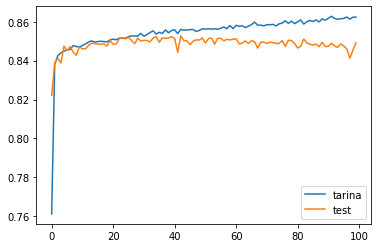

In [8]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_lr_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_lr_1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5451 - accuracy: 0.7484 - val_loss: 0.4685 - val_accuracy: 0.7543
Epoch 2/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8246 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3143 - accuracy: 0.8519 - val_loss: 0.3209 - val_accuracy: 0.8488
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3143 - accuracy: 0.8521 - val_loss: 0.3209 - val_accuracy: 0.8493
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3143 - accuracy: 0.8527 - val_loss: 0.3210 - val_accuracy: 0.8493
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3143 - accuracy: 0.8524 - val_loss: 0.3214 - val_accuracy: 0.8494
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3142 - accuracy: 0.8528 - val_loss: 0.3211 - val_accuracy: 0.8495
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3142 - accuracy: 0.8529 - val_loss: 0.3210 - val_accuracy: 0.8496
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3142 - accuracy: 0.8518 - val_loss: 0.3209 - val_accuracy:

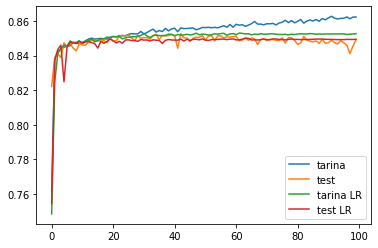

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")

plt.plot(history_lr_1.history['accuracy'], label = "tarina LR")
plt.plot(history_lr_1.history['val_accuracy'], label = "test LR")
plt.legend()
plt.show()

# Adam

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History


history_Adam_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam_1])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8256 - val_loss: 0.3471 - val_accuracy: 0.8329
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8450 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2750 - accuracy: 0.8697 - val_loss: 0.3312 - val_accuracy: 0.8499
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2738 - accuracy: 0.8705 - val_loss: 0.3313 - val_accuracy: 0.8481
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2737 - accuracy: 0.8704 - val_loss: 0.3340 - val_accuracy: 0.8470
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2722 - accuracy: 0.8709 - val_loss: 0.3337 - val_accuracy: 0.8493
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2720 - accuracy: 0.8715 - val_loss: 0.3359 - val_accuracy: 0.8466
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.8721 - val_loss: 0.3342 - val_accuracy: 0.8469
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2701 - accuracy: 0.8722 - val_loss: 0.3402 - val_accuracy:

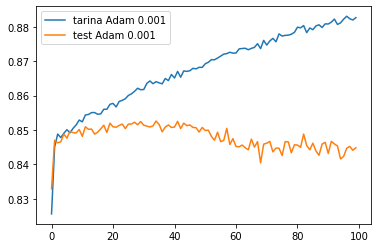

In [12]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate


history_Adam_2 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_Adam_2])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3830 - accuracy: 0.8221 - val_loss: 0.3407 - val_accuracy: 0.8421
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3347 - accuracy: 0.8439 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3014 - accuracy: 0.8584 - val_loss: 0.3176 - val_accuracy: 0.8501
Epoch 53/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.8582 - val_loss: 0.3176 - val_accuracy: 0.8507
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3013 - accuracy: 0.8584 - val_loss: 0.3176 - val_accuracy: 0.8507
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3013 - accuracy: 0.8583 - val_loss: 0.3175 - val_accuracy: 0.8513
Epoch 56/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3013 - accuracy: 0.8582 - val_loss: 0.3176 - val_accuracy: 0.8509
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3012 - accuracy: 0.8584 - val_loss: 0.3176 - val_accuracy: 0.8513
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3012 - accuracy: 0.8584 - val_loss: 0.3177 - val_accuracy:

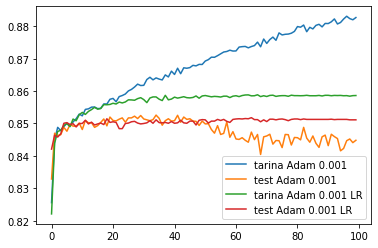

In [14]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")

plt.plot(history_Adam_2.history['accuracy'], label = "tarina Adam 0.001 LR")
plt.plot(history_Adam_2.history['val_accuracy'], label = "test Adam 0.001 LR")
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_Adam_3 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam_3])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.7053 - val_loss: 0.5236 - val_accuracy: 0.7543
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.7710 - val_

943/943 [==============================] - 1s 1ms/step - loss: 0.3181 - accuracy: 0.8509 - val_loss: 0.3229 - val_accuracy: 0.8491
Epoch 51/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3180 - accuracy: 0.8515 - val_loss: 0.3229 - val_accuracy: 0.8489
Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3178 - accuracy: 0.8518 - val_loss: 0.3226 - val_accuracy: 0.8495
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8520 - val_loss: 0.3223 - val_accuracy: 0.8493
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3174 - accuracy: 0.8511 - val_loss: 0.3223 - val_accuracy: 0.8487
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3173 - accuracy: 0.8511 - val_loss: 0.3223 - val_accuracy: 0.8493
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3172 - accuracy: 0.8518 - val_loss: 0.3220 - val_accuracy: 0.8491
Epoch

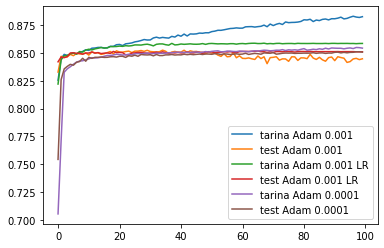

In [16]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")

plt.plot(history_Adam_2.history['accuracy'], label = "tarina Adam 0.001 LR")
plt.plot(history_Adam_2.history['val_accuracy'], label = "test Adam 0.001 LR")

plt.plot(history_Adam_3.history['accuracy'], label = "tarina Adam 0.0001")
plt.plot(history_Adam_3.history['val_accuracy'], label = "test Adam 0.0001")

plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate


history_Adam_4 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_Adam_4])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5408 - accuracy: 0.7511 - val_loss: 0.4755 - val_accuracy: 0.7550
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8098 - val_

943/943 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8483 - val_loss: 0.3311 - val_accuracy: 0.8468
Epoch 51/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8485 - val_loss: 0.3311 - val_accuracy: 0.8468
Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8485 - val_loss: 0.3311 - val_accuracy: 0.8469
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8485 - val_loss: 0.3310 - val_accuracy: 0.8469
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8485 - val_loss: 0.3310 - val_accuracy: 0.8468
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8481 - val_loss: 0.3310 - val_accuracy: 0.8466
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8485 - val_loss: 0.3310 - val_accuracy: 0.8467
Epoch

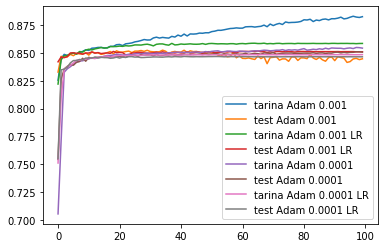

In [18]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")

plt.plot(history_Adam_2.history['accuracy'], label = "tarina Adam 0.001 LR")
plt.plot(history_Adam_2.history['val_accuracy'], label = "test Adam 0.001 LR")

plt.plot(history_Adam_3.history['accuracy'], label = "tarina Adam 0.0001")
plt.plot(history_Adam_3.history['val_accuracy'], label = "test Adam 0.0001")

plt.plot(history_Adam_4.history['accuracy'], label = "tarina Adam 0.0001 LR")
plt.plot(history_Adam_4.history['val_accuracy'], label = "test Adam 0.0001 LR")


plt.legend()
plt.show()